> COMPONENTES DO PROCESSADOR

In [65]:
# Variáveis que serão usadas 
R0 = ""
RDM = ""
x = "instrucao"
RI = "" 
CIinicial = Einicial
REM = 0
CIfinal = Efinal
Cop = ""
op = ""

> Essa variávei serão usadas dentro e fora das funções, por isso que elas são declaradas como globais.

In [66]:
# REM
def rem(REM):
    global x
    if(REM >= 0 and REM < Einicial):
        x = "dado"
    if(REM >= Einicial and REM <= Efinal):
        x = "instrucao"

> Função que identifica se o que está armazenado na REM é um dado ou uma instrução. Isso já é pré - definido lá embaixo no preenchimento dos dados e instruçoes na mémoria. O primeiro if vai fazer o REM ir de 0 até antes do Endereço inicial e isso é um dado. O segundo vai do Endereço inicial até o Endereço final e isso é um instrução. 

In [67]:
# CI                                                                                  
def CI(x):
    global REM, CIinicial
    if(x == "instrucao"):
        REM = CIinicial
        CIinicial +=1


> Função que imita o funcionamento do CI. Se a váriavel x for uma instrução, a REM vai receber o CI inicial que é o Endereço inicial já pré - definido lá em baixo no preenchimento das instruçoes na mémoria. Depois o CI será incrementado.

In [68]:
# RDM
def rdm(REM):
    global RDM
    RDM = MP[REM]
    

> Função que imita o funcionamento do RDM. A variável RDM recebe o dado ou instrução da memória principal na posição REM (Na posição do CI).

In [69]:
# R0
def r0(RDM, x):
    global R0
    if(x == "dado"):
        R0 = RDM

> Função que imita o funcionamento do R0. O R0 só armazena dados então se a variável x for igual a "dado", a variável R0 vai receber o que estiver armazenado no RDM.

In [70]:
# RI
def ri(x, Einicial, Efinal, RDM):
    global Cop, op, REM, CIinicial, RI  
    if(x == "instrucao"):
        Cop = ""  
        op = ""
        RI = RDM           # RI = 12 bits
        
        for i in range(4): # 4 bits -- Código do operando
            Cop += RI[i] 
            
        for i in range(8): # 8 bits -- Operando
            op += RI[i+4]

> Função que imita o funcionamento do RI (Registrador de instruções). Se a variável x for igual a "instrução", o RI vai receber o RDM e, atráves do for, vai quebrar o RI em código do operando e operando.

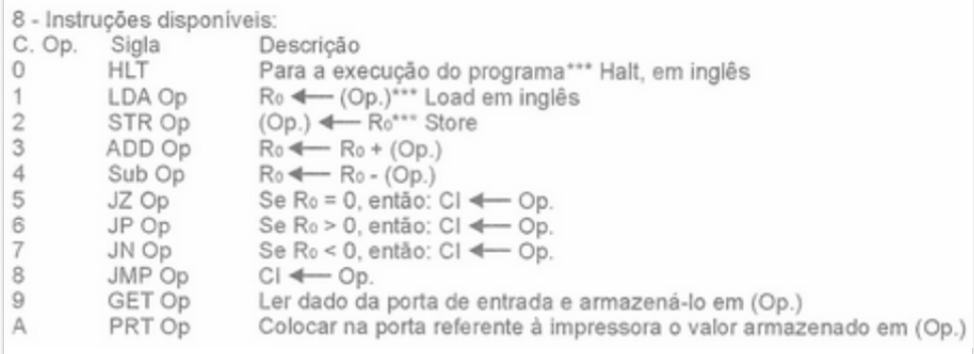

0. HLT -- Para a execução do programa no momento que que o CI inicial recebe o final.

In [71]:
def HLT(CIfinal):                                                                   
    global CIinicial
    CIinicial = CIfinal

1) LDA Op -- Carrega o conteúdo de (op) para dentro do R0 

In [72]:
def LDA(RDM):
    #instrucao
    global R0
    R0 = RDM

2. STR Op -- Armazena R0 no endereço (op)

In [73]:
def STR(R0, op):
    global REM, RDM
    REM = int(op,2)  #Transforma o que está em op em um valor decimal equivalente
    RDM = R0
    MP[REM] = RDM 

3. ADD Op -- soma (op) com R0 

In [74]:
def ADD(RDM):
    global R0
    soma = int(RDM,2) + int(R0,2)
    R0 = format(soma,'012b')      #Transforma a soma em um valor binário de 12 bits

4. SUB Op -- subtrai (op) com R0

In [75]:
def SUB(RDM):
    global R0
    subtracao = int(R0,2) - int(RDM,2)
    R0 = format(subtracao,'012b')

5. JZ Op -- se R0 = 0, CI recebe (op)  

In [76]:
def JZ(R0, op):
    global CIinicial, x
    if(int(R0,2) == 0):
        CIinicial = int(op,2) #CI vai receber o valor decimal de op 
        x = "instrucao"

6. JP Op -- se R0 > 0, CI recebe (op) 

In [77]:
def JP(R0, op):  
    global CIinicial, x
    if(int(R0,2) > 0):
        CIinicial = int(op,2)
        x = "instrucao"

7. JN Op -- se R0 < 0, CI recebe (op)                                                             

In [78]:
def JN(R0, op):  
    global CIinicial, x
    if(int(R0,2) < 0):
        CIinicial = int(op,2)
        x = "instrucao"

8. JMP Op -- CI recebe R0 independente do R0                                               

In [79]:
def JMP(op):
    global CIinicial, x
    CIinicial = int(op,2)
    x = "instrucao"

9. GET Op -- Ler dado da porta de entrada e armazena-lo em (op)                       

In [80]:
def GET(op):
    MP[int(op,2)] = input("\nDigite um número binário de 8 bits: ")

10. (A) PRT Op -- coloca na porta referente à impressora o valor armazenado em (op)        

In [81]:
def PRT(op):
    a = MP[int(op,2)]
    print("\n",MP[int(op,2)]," = ",int(a,2),"\n")

In [82]:
def Decodificador(Cop):
    global REM, RDM
    
    # C. op: 0 
    if(int(Cop,2)==0):
        HLT(CIfinal)
    
    # C. op: 1
    if(int(Cop,2)==1):
        REM = int(op,2)
        RDM = MP[REM]    #Recebe o numero da posição de op na memória
        LDA(RDM)
    
    # C. op: 2
    if(int(Cop,2)==2):
        REM = int(op,2)
        RDM = MP[REM]
        STR(R0, op)
    
    # C. op: 3
    if(int(Cop,2)==3):
        REM = int(op,2)
        RDM = MP[REM]
        ADD(RDM)
    
    # C. op: 4
    if(int(Cop,2)==4):
        REM = int(op,2)
        RDM = MP[REM]
        SUB(RDM)
    
    # C. op: 5
    if(int(Cop,2)==5):
        JZ(R0, op)
    
    # C. op: 6
    if(int(Cop,2)==6):
        JP(R0, op)
    
    # C. op: 7
    if(int(Cop,2)==7):
        JN(R0, op)
    
    # C. op: 8
    if(int(Cop,2)==8):
        JMP(op)
        
    # C. op: 9    
    if(int(Cop,2)==9):
        GET(op)
        
    # C. op: A    
    if(int(Cop,2)==10):
        PRT(op)

In [83]:

print("Simulação de um número elevado a 2 no processador")

#Memória Principal
MP = []
for i in range(256):
    MP.append("000000000000")
    
#Endereços dados
MP[0] = ""
MP[1] = "000000000000"
MP[2] = "000000000001"
MP[3] = "000000000000"

#Endereços instruções
MP[4] = "100100000000"   #9 - Pega o que está na posição 0
MP[5] = "000100000000"   #1 - Carrega o que está na posição 0 no R0
MP[6] = "001000000001"   #2 - Escreve o conteúdo do R0 na posição 1
MP[7] = "000100000011"   #1 - Carrega o que está na posição 3 no R0
MP[8] = "001100000000"   #3 - Soma a posição 0 com R0
MP[9] = "001000000011"   #2 - Escreve o conteúdo do R0 na posição 3
MP[10] = "000100000001"  #1 - Carrega o que está na posição 1 no R0
MP[11] = "010000000010"  #4 - Subtrai a posição 2 com R0
MP[12] = "001000000001"  #2 - Escreve o conteúdo do R0 na posição 1
MP[13] = "011000000110"  #6 - Se R0 > 0, CI = posição 6 e volta para esse mesma posição 
MP[14] = "101000000011"  #10 - Após a condição acima ser falsa, ele printa o que está na posição 3
MP[15] = "000000000000"  #0 - Após isso, o programa encerra
    

#Começo e fim da instruções
Einicial = 4
Efinal = 15


while(CIinicial < CIfinal):
    CI(x)
    rem(REM)
    rdm(REM)
    ri(x, Einicial, Efinal, RDM)
    r0(RDM, x)
    Decodificador(Cop)
    

Simulação de um número elevado a 2 no processador



Digite um número binário de 8 bits:  00001000



 000001000000  =  64 

